In [1]:
# import packages
import numpy as np
import pandas as pd
import math

In [4]:
df = pd.read_csv('/content/drive/Shareddrives/Math 365 CLA final project/data/R_film_data.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df.head()

,userId,movieIdDense,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,2,4.0,Grumpier Old Men (1995),Comedy|Romance
2,1,3,4.0,Heat (1995),Action|Crime|Thriller
3,1,4,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,5,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [6]:
pivot_table = df.pivot_table(index='userId', columns='movieIdDense', values='rating')

In [7]:
pivot_table.head()

movieIdDense,1,2,3,4,5,6,7,8,9,10,...,9715,9716,9717,9718,9719,9720,9721,9722,9723,9724
userId,,,,,,,,,,,,,,,,,,,,,
1,4.0,4.0,4.0,5.0,5.0,3.0,5.0,4.0,5.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,NaN,4.0,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
X = pivot_table.iloc[:100,1:100].to_numpy(dtype=float)
X_1 = pivot_table.iloc[:100,1:500].to_numpy(dtype=float)
X_2 = pivot_table.iloc[:100,1:1000].to_numpy(dtype=float)
X_3 = pivot_table.iloc[:100,1:2000].to_numpy(dtype=float)

In [41]:
def matrix_completion(X, res, threshold=1, epsilon=0.01):
    """
    Lower rank matrix completion using iterative singular value thresholding
    :param X:
    :param threshold:
    :param epsilon:
    :param res:
    :return:
    """
    n, m = X.shape
    X_hat = np.zeros((n, m))
    X_hat = copy_values(X, X_hat)
    while True:
        X_hat_old = X_hat
        u, e, vh = np.linalg.svd(X_hat, full_matrices=True)
        # remove singular values less than threshold
        e = list(map(lambda val: val if val >= threshold else 0, e))
        E = np.zeros((n, m))
        E[0:min(m, n), 0:min(m, n)] = np.diag(e)
        X_hat = np.matmul(np.matmul(u, E), vh)
        X_hat = copy_values(X, X_hat)
        f_norm = np.linalg.norm(X_hat - X_hat_old)
        res.append(f_norm)
        if f_norm < epsilon:
            break
    return X_hat

In [42]:
def copy_values(X, X_hat):
    n, m = X.shape
    for i in range(n):
        for j in range(m):
            if not math.isnan(X[i][j]):
                X_hat[i][j] = X[i][j]
    return X_hat

In [43]:
res = []
res1 = []
res2 = []
res3 = []
X_hat = matrix_completion(X, res, 1, 0.01)
X_hat = matrix_completion(X, res1, 5, 0.01)
X_hat = matrix_completion(X, res2, 10, 0.01)
X_hat = matrix_completion(X, res3, 15, 0.01)

In [14]:
X_hat

array([[4.        , 4.        , 5.        , ..., 4.        , 5.        ,
        4.        ],
       [3.52054578, 3.94916007, 3.98576111, ..., 3.73945845, 3.97327055,
        3.19114013],
       [1.62531144, 1.82318749, 1.8400849 , ..., 1.72637568, 1.83431845,
        1.4732365 ],
       ...,
       [3.45829799, 3.87933382, 3.91528771, ..., 3.67334   , 3.903018  ,
        3.13471665],
       [4.1960577 , 4.70691323, 4.75053718, ..., 4.45697469, 4.73564997,
        3.80344667],
       [3.5       , 3.73719644, 3.771833  , ..., 4.5       , 4.        ,
        3.01986177]])

In [31]:
print(len(res), len(res1), len(res2), len(res3))

4 10 38 415


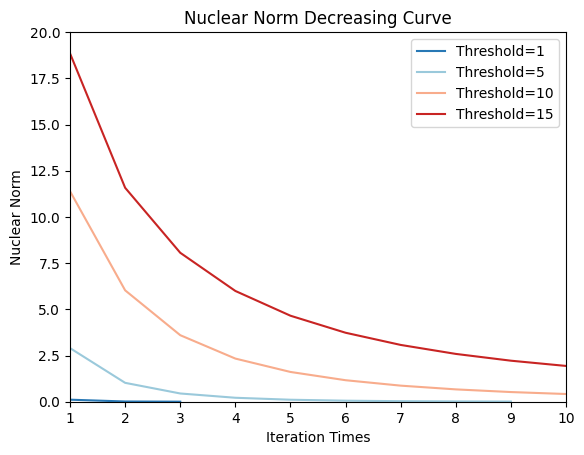

In [60]:
import numpy as np
import matplotlib.pyplot as plt

# Define x values
x = range(25)

# Define y values as a normal decreasing function


# Plot the curve
plt.plot(range(len(res)), res, label="Threshold=1", color='#2878B5')
plt.plot(range(len(res1)), res1, label="Threshold=5", color='#9AC9DB')
plt.plot(range(len(res2)), res2, label="Threshold=10", color='#F8AC8C')
plt.plot(range(len(res3)), res3, label="Threshold=15", color='#C82423')

plt.xlim(1, 10)
plt.ylim(0, 20)

# Add a title and axis labels
plt.title("Nuclear Norm Decreasing Curve")
plt.xlabel("Iteration Times")
plt.ylabel("Nuclear Norm")
plt.legend()

# Show the plot
# plt.show(dpi=300)
plt.savefig("/content/drive/Shareddrives/Math 365 CLA final project/curve1.png", dpi=300)

In [ ]:
def map_to_rating_values(X):
    n, m = X.shape
    for i in range(n):
        for j in range(m):
            val = X[i][j]
            if val <= 1.5:
                X[i][j] = 1
            elif 1.5 < val <= 2.5:
                X[i][j] = 2
            elif 2.5 < val <= 3.5:
                X[i][j] = 3
            elif 3.5 < val <= 4.5:
                X[i][j] = 4
            else:
                X[i][j] = 5

    return X

def solve_V(X, U):
    """
    Given matrix X of shape (n, m),  U of shape (n, k), returns V of shape (m, k) such that X = U * transpose(V)
    :param X:
    :param U:
    :return:
    """
    n, m = X.shape
    k = U.shape[1]
    V = np.zeros((m, k))
    for i in range(m):
        column = X[:, i].flatten()
        indexes = np.argwhere(~np.isnan(column)).flatten()
        U_omega = U[indexes, :]
        y_omega = X[indexes, i]
        V[i, :] = np.linalg.lstsq(U_omega, y_omega)[0]
    return V


def alt_min(X, U_0, T):
    """
    Given X, initial values of U and number of iterations T, returns U, V such that X = U * transpose(V)
    :param X:
    :param U_0:
    :param T:
    :return:
    """
    U = U_0
    for _ in range(T):
        V = solve_V(X, U)
        U = solve_V(np.transpose(X), V)
    return U, V


def matrix_completion(X, T, k):
    """
    Given a matrix X with missing values, fills missing values in X
    :param X:
    :param T:
    :param k:
    :return:
    """
    X_hat = np.nan_to_num(X)
    U, e, V_t = np.linalg.svd(X_hat, full_matrices=True)
    U, V = alt_min(X, U[:, :k], T)
    X_filled = np.matmul(U, np.transpose(V))
    X_filled = copy_values(X, X_filled)
    X_filled = map_to_rating_values(X_filled)
    return X_filled



In [ ]:
X = pivot_table.iloc[:100,1:100].to_numpy(dtype=float)
T = 100
k = 5
X_hat = matrix_completion(X, T, k)

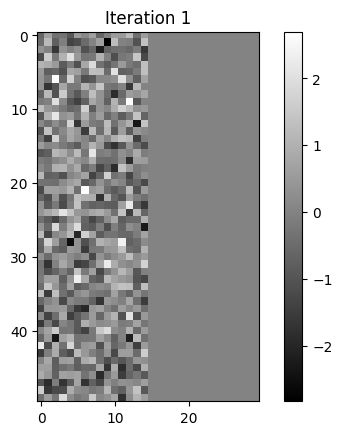

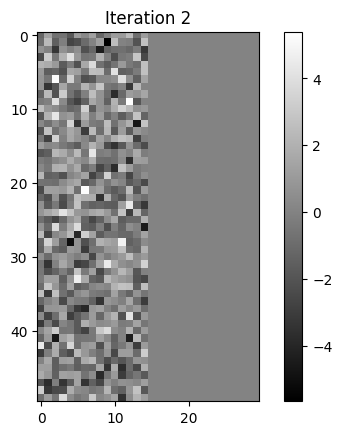

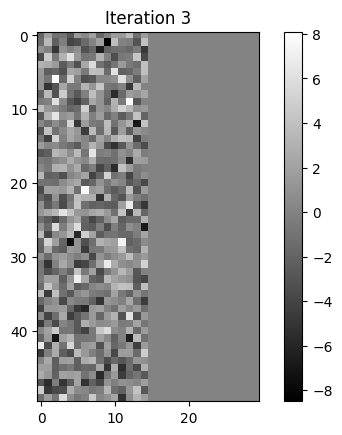

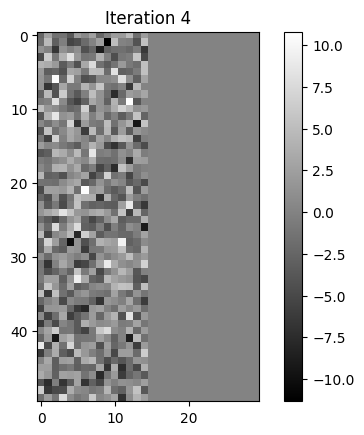

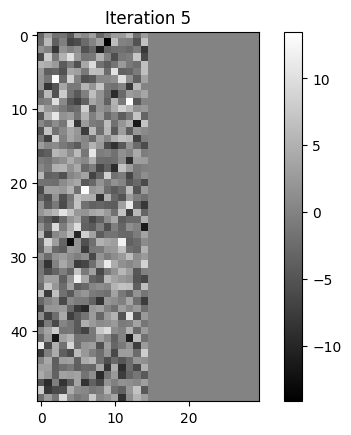

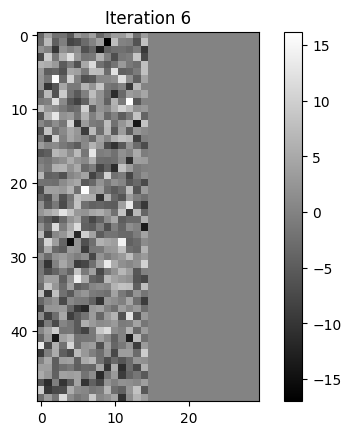

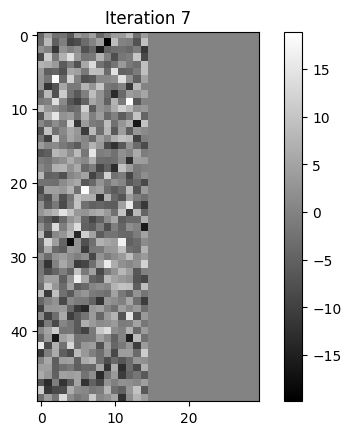

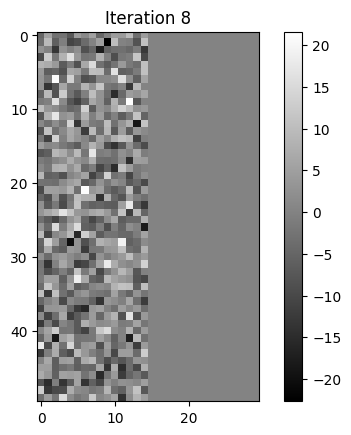

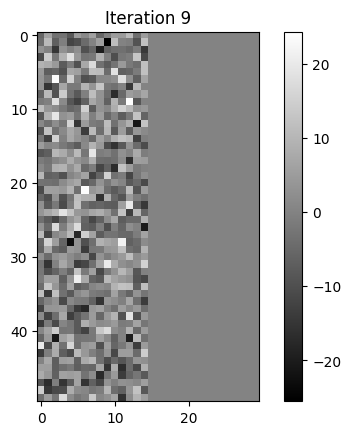

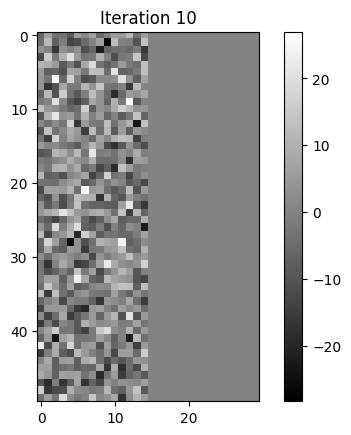

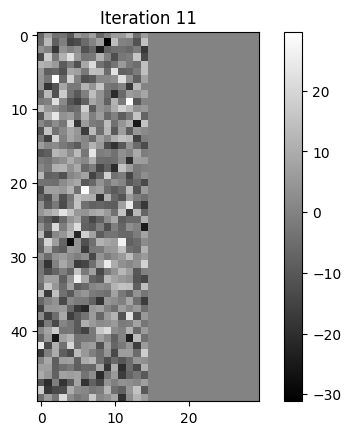

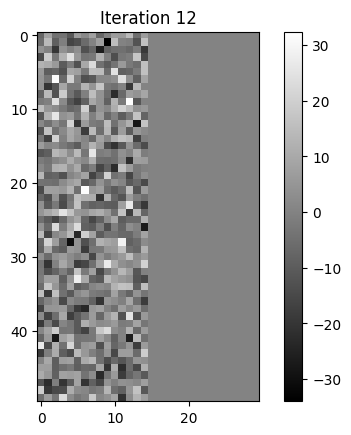

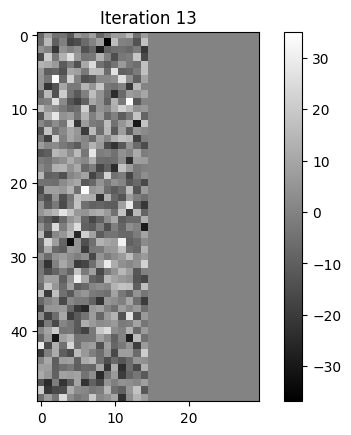

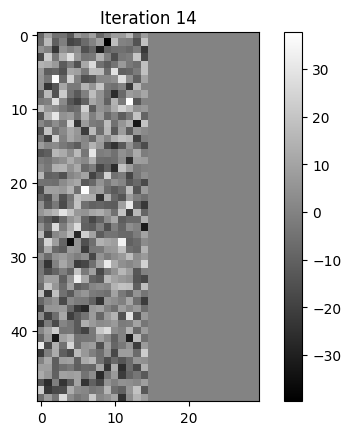

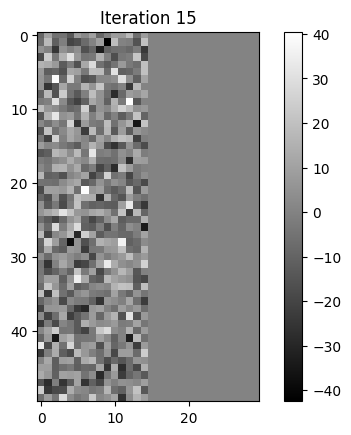

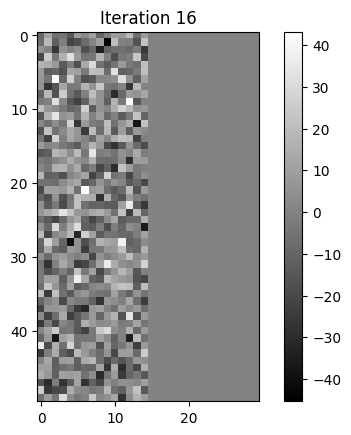

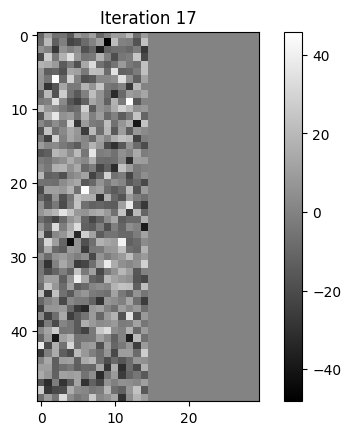

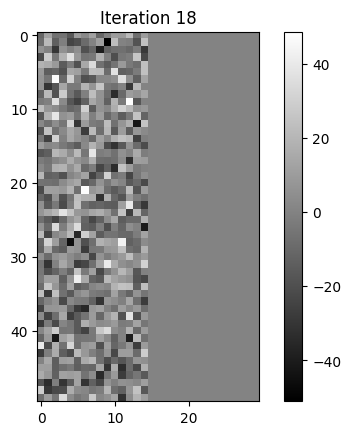

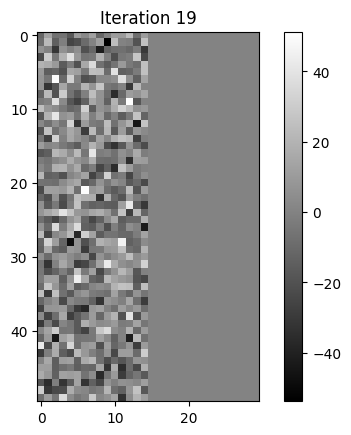

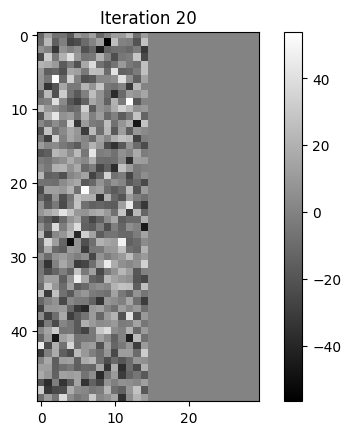

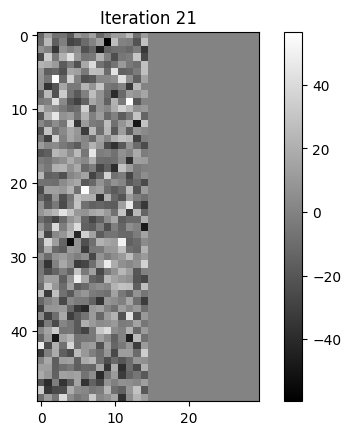

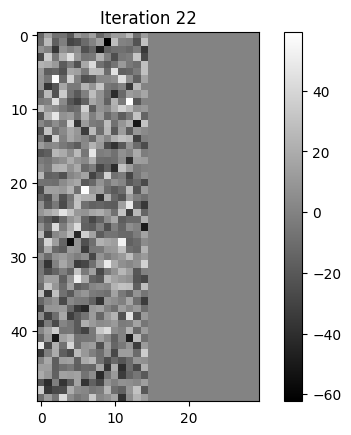

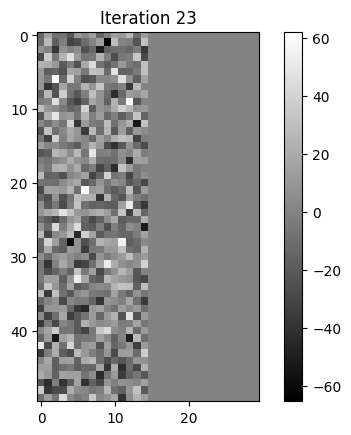

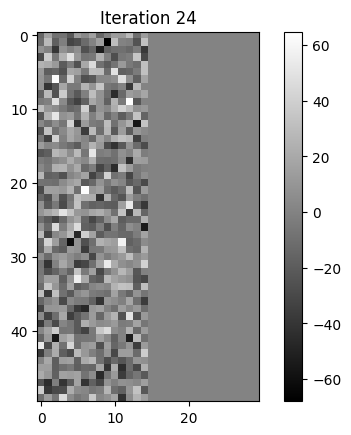

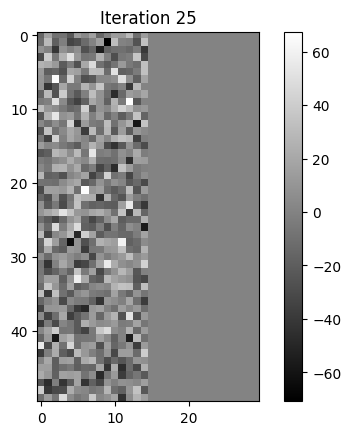

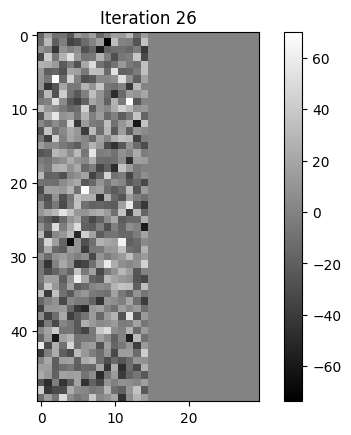

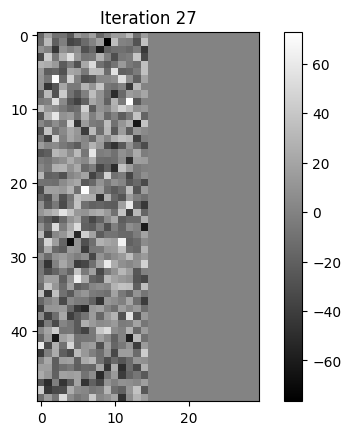

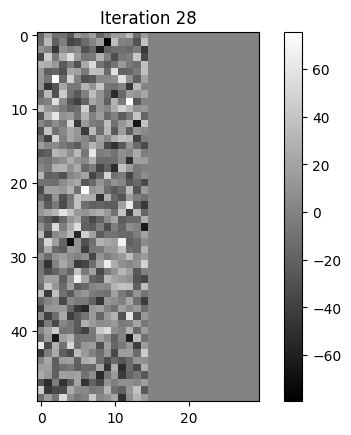

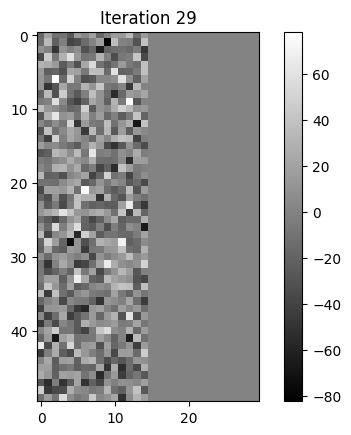

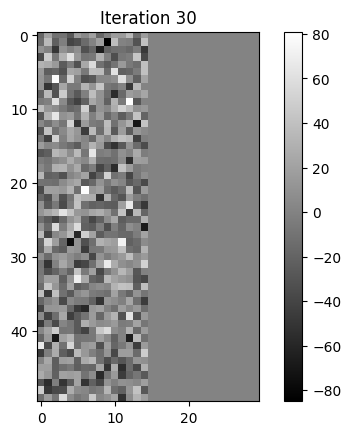

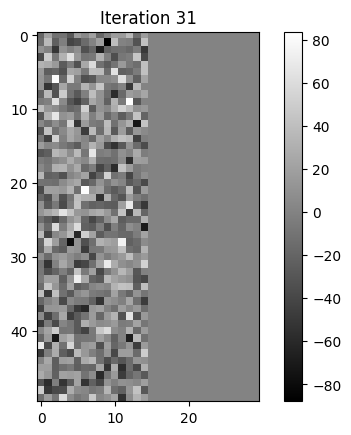

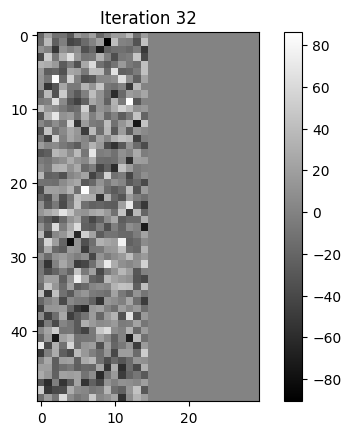

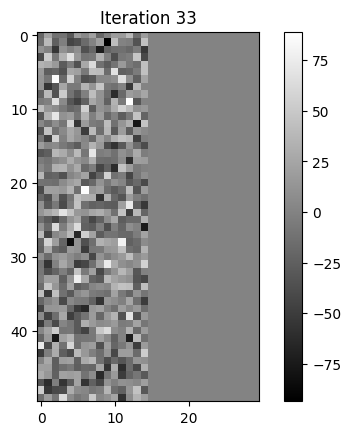

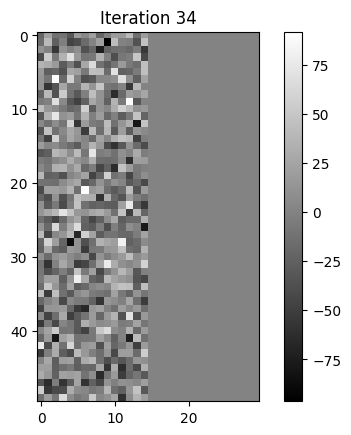

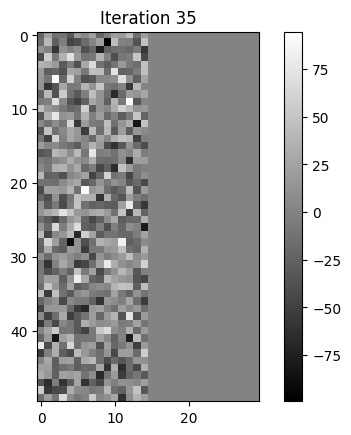

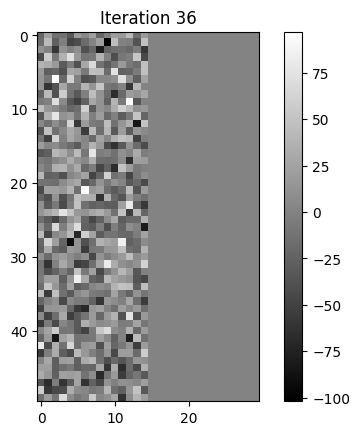

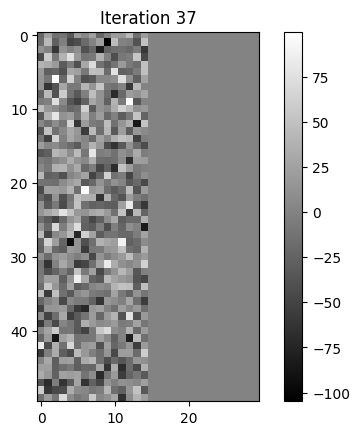

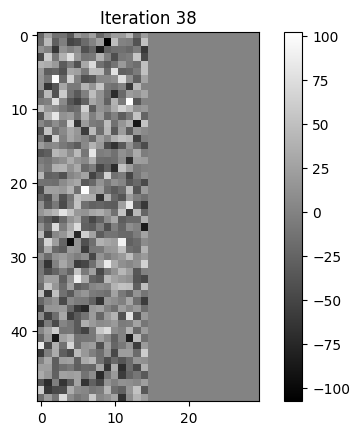

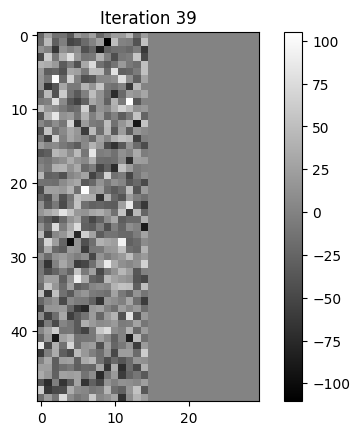

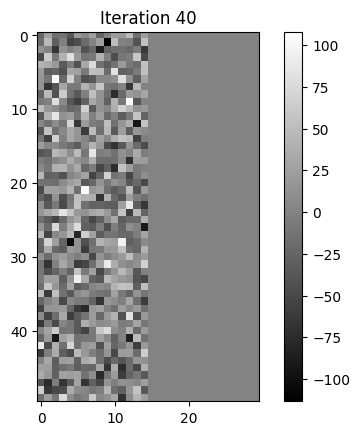

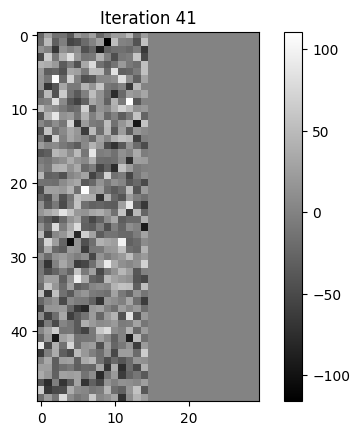

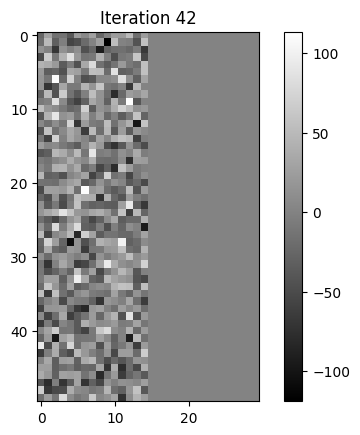

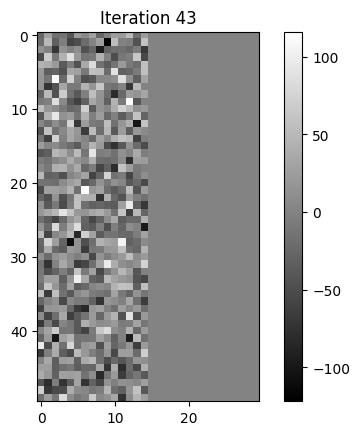

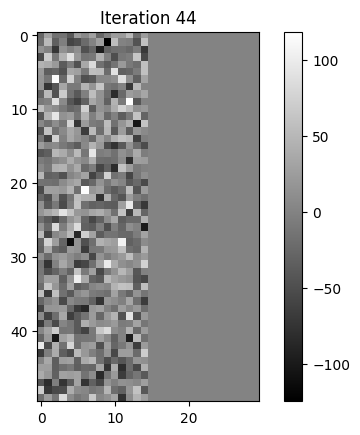

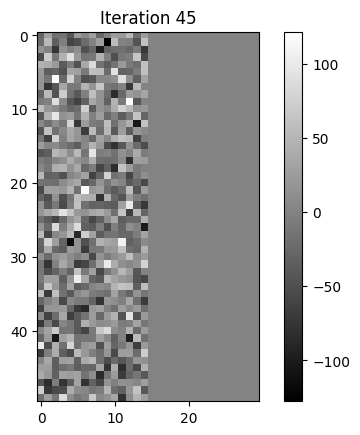

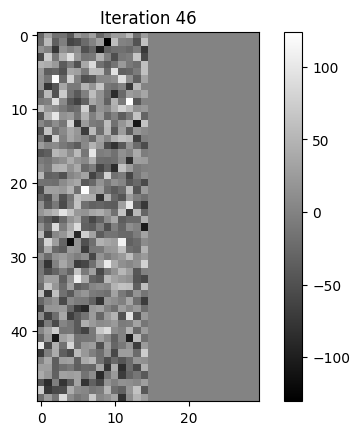

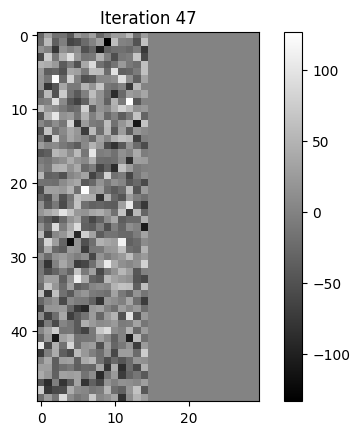

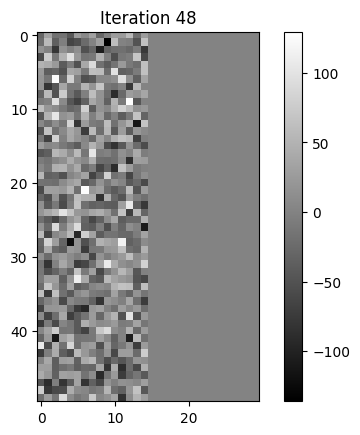

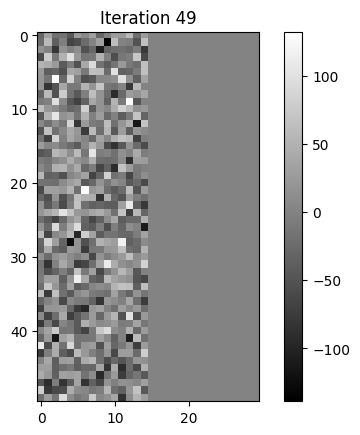

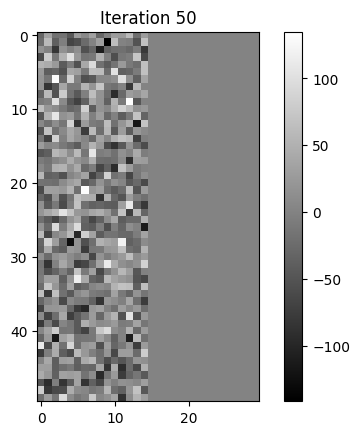

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a random matrix of size (m, n)
m, n = 50, 30
A = np.random.randn(m, n)

# Set the first half of the entries in each row to zero to simulate missing entries
mask = np.zeros((m, n))
mask[:, :n//2] = 1
B = A * mask

# Perform matrix completion using singular value thresholding (SVT)
tau = 0.5
max_iter = 50
X = np.zeros((m, n))

for i in range(max_iter):
    U, s, Vt = np.linalg.svd(X + B, full_matrices=False)
    s = np.maximum(s - tau, 0)
    X = U @ np.diag(s) @ Vt

    # Plot the current matrix X for visualization
    plt.clf()
    plt.imshow(X, cmap='gray')
    plt.colorbar()
    plt.title('Iteration {}'.format(i+1))
    plt.show()


In [88]:
def matrix_completion(X, res, threshold=1, epsilon=0.01):
    """
    Lower rank matrix completion using iterative singular value thresholding
    :param X:
    :param threshold:
    :param epsilon:
    :param res:
    :return:
    """
    n, m = X.shape
    X_hat = np.zeros((n, m))
    X_hat = copy_values(X, X_hat)
    step = 0
    while True:
        step += 1
        X_hat_old = X_hat
        u, e, vh = np.linalg.svd(X_hat, full_matrices=True)
        # remove singular values less than threshold
        e = list(map(lambda val: val if val >= threshold else 0, e))
        E = np.zeros((n, m))
        E[0:min(m, n), 0:min(m, n)] = np.diag(e)
        X_hat = np.matmul(np.matmul(u, E), vh)
        X_hat = copy_values(X, X_hat)
        f_norm = np.linalg.norm(X_hat - X_hat_old)
        res.append(f_norm)
        if step%5==1 and step < 80:
          plt.clf()
          plt.imshow(X_hat, cmap='binary')
          plt.colorbar()
          plt.title('Iteration {}'.format(step))
          plt.savefig("/content/drive/Shareddrives/Math 365 CLA final project/matrixComplete {}.png".format(step//5), dpi=300)
        if f_norm < epsilon:
            break
    
    return X_hat
    
    

In [ ]:
def matrix_factorization(R, P, Q, K, steps=5000, alpha=0.0002, beta=0.02):
    '''
    R: rating matrix
    P: |U| * K (User features matrix)
    Q: |D| * K (Item features matrix)
    K: latent features
    steps: iterations
    alpha: learning rate
    beta: regularization parameter'''
    Q = Q.T

    for step in range(steps):
        for i in range(len(R)):
            for j in range(len(R[i])):
                if R[i][j] > 0:
                    # calculate error
                    eij = R[i][j] - numpy.dot(P[i,:],Q[:,j])

                    for k in range(K):
                        # calculate gradient with a and beta parameter
                        P[i][k] = P[i][k] + alpha * (2 * eij * Q[k][j] - beta * P[i][k])
                        Q[k][j] = Q[k][j] + alpha * (2 * eij * P[i][k] - beta * Q[k][j])

        eR = numpy.dot(P,Q)

        e = 0

        for i in range(len(R)):

            for j in range(len(R[i])):

                if R[i][j] > 0:

                    e = e + pow(R[i][j] - numpy.dot(P[i,:],Q[:,j]), 2)

                    for k in range(K):

                        e = e + (beta/2) * (pow(P[i][k],2) + pow(Q[k][j],2))
        # 0.001: local minimum
        if e < 0.001:
            break
        if step%10==1:
          plt.clf()
          plt.imshow(X_hat, cmap='Dark2')
          plt.colorbar()
          plt.title('Iteration {}'.format(step))
          plt.show()
        

    return P, Q.T

array([[4.        , 4.        , 5.        , ..., 4.        , 5.        ,
        4.        ],
       [3.52054578, 3.94916007, 3.98576111, ..., 3.73945845, 3.97327055,
        3.19114013],
       [1.62531144, 1.82318749, 1.8400849 , ..., 1.72637568, 1.83431845,
        1.4732365 ],
       ...,
       [3.45829799, 3.87933382, 3.91528771, ..., 3.67334   , 3.903018  ,
        3.13471665],
       [4.1960577 , 4.70691323, 4.75053718, ..., 4.45697469, 4.73564997,
        3.80344667],
       [3.5       , 3.73719644, 3.771833  , ..., 4.5       , 4.        ,
        3.01986177]])

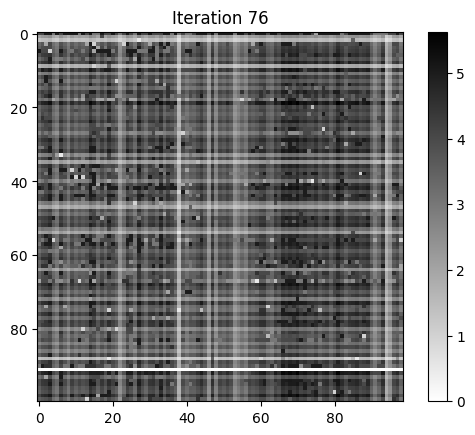

In [89]:
matrix_completion(X, res, 50)